In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [5]:
dv_matrix = np.load('../../processed_files/d2v_matrix.npy')
df_merged = pickle.load(open("../../processed_files/df_merged.pickle", "rb"))

In [6]:
dv_matrix.shape

(12968, 300)

In [7]:
df_merged.head()

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ..."
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ..."
2,01187.com,01187.com is available for purchase! - wwwv1.c...,"[com, vailable, purchase, wwwvcom, welcome, uu...","[0, 1, 1, 8, 7, ., c, o, m, , i, s, , a, v, ..."
3,027.ir,"027.ir - dns4.ir 027.ir hits: 7,267 under cons...","[ir, dnsir, ir, hits, construction, coming, so...","[0, 2, 7, ., i, r, , -, , d, n, s, 4, ., i, ..."
4,03h.org,february | 2014 | online marketing review sear...,"[february, online, marketing, review, search, ...","[f, e, b, r, u, a, r, y, , |, , 2, 0, 1, 4, ..."


In [8]:
df_merged.shape

(12975, 4)

In [9]:
type(dv_matrix[0])

numpy.ndarray

In [11]:
np.average(dv_matrix[[0, 1, 2]], axis=0)

array([-0.03190145, -0.02559912,  0.15567708, -0.00941179,  0.08908174,
       -0.06675011, -0.15705897,  0.03244489, -0.07183129,  0.07949363,
        0.18978079, -0.12861936,  0.1208543 ,  0.06617323, -0.24089359,
        0.06082607, -0.10568041,  0.03433612, -0.08999396,  0.1187163 ,
       -0.02619448,  0.05026269,  0.11325518,  0.07444578,  0.05584133,
       -0.04259403,  0.01480662, -0.11077237,  0.11063346,  0.06164384,
        0.06277482,  0.05113742,  0.03867247, -0.0459002 , -0.11198241,
       -0.07865223,  0.00462539, -0.10708603,  0.0275389 , -0.11615145,
       -0.00485481, -0.04078722, -0.03119052, -0.08751086, -0.03339142,
        0.22341943, -0.06227361, -0.10211039,  0.06381115,  0.12919667,
        0.03388846, -0.04297079, -0.0827361 , -0.02895331,  0.08340953,
       -0.03103167,  0.14897418,  0.0410312 ,  0.01128912, -0.1026389 ,
        0.04599464, -0.04784001,  0.15819648, -0.0759355 ,  0.14125405,
       -0.00899684, -0.05880195, -0.13367681, -0.08820086,  0.00

## DB Scan

In [12]:
from sklearn.cluster import DBSCAN

In [32]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
dbscan = DBSCAN(eps = 0.5, min_samples = 5).fit(dv_matrix)

In [33]:
dbscan.labels_

array([ 0,  0, -1, ...,  0, -1, -1])

In [34]:
num_clusters = max(dbscan.labels_)
num_clusters

5

In [35]:
dbscan

DBSCAN()

In [36]:
index_cluster = zip(range(len(dbscan.labels_)), dbscan.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[1]

0

In [37]:
cluster_index = list(zip(dbscan.labels_, range(len(dbscan.labels_))))

In [38]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [39]:
for i in range(num_clusters):
    print('cluster: ', i, 'size: ', len(cluster_list[i]))

cluster:  0 size:  2155
cluster:  1 size:  7
cluster:  2 size:  16
cluster:  3 size:  21
cluster:  4 size:  13


In [40]:
len(cluster_list)

5

In [41]:
len(cluster_list[1])

7

In [42]:
len(cluster_list[2])

16

In [43]:
len(cluster_list[num_clusters-1])

13

In [44]:
cluster_list[1]

[(1, 113), (1, 1622), (1, 3128), (1, 4976), (1, 5205), (1, 7845), (1, 12299)]

In [46]:
[i[1] for i in cluster_list[0]]

[0,
 1,
 8,
 22,
 24,
 25,
 27,
 30,
 32,
 39,
 58,
 63,
 66,
 80,
 96,
 98,
 100,
 105,
 118,
 121,
 123,
 124,
 130,
 138,
 140,
 141,
 144,
 148,
 154,
 160,
 161,
 167,
 168,
 169,
 172,
 174,
 179,
 198,
 201,
 207,
 218,
 226,
 229,
 252,
 255,
 260,
 262,
 265,
 280,
 297,
 304,
 308,
 311,
 313,
 318,
 322,
 327,
 339,
 351,
 352,
 365,
 373,
 387,
 393,
 398,
 400,
 405,
 420,
 434,
 460,
 465,
 471,
 472,
 476,
 479,
 480,
 481,
 488,
 496,
 497,
 503,
 525,
 530,
 536,
 563,
 568,
 573,
 575,
 578,
 589,
 594,
 604,
 608,
 620,
 621,
 627,
 628,
 631,
 633,
 637,
 641,
 642,
 647,
 652,
 658,
 660,
 662,
 663,
 670,
 683,
 696,
 697,
 714,
 719,
 722,
 723,
 729,
 745,
 746,
 748,
 752,
 763,
 768,
 770,
 782,
 783,
 786,
 789,
 790,
 791,
 795,
 797,
 801,
 802,
 815,
 817,
 822,
 825,
 834,
 840,
 856,
 861,
 881,
 889,
 891,
 892,
 896,
 899,
 903,
 913,
 937,
 943,
 949,
 950,
 951,
 952,
 953,
 961,
 977,
 980,
 994,
 995,
 1002,
 1003,
 1022,
 1025,
 1026,
 1029,
 1030

In [51]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = np.average(dv_matrix[[i[1] for i in cluster_list[index]]], axis=0)
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-dv_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [52]:
intracluster_similarity(0)

(0.51096255, 0.047496248)

In [53]:
intracluster_similarity(1)

(0.301582, 0.00089649705)

In [54]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [57]:
generate_raw_content_cluster_df(0)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ...",0
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",0
8,1-mag.com,captcha powered by intershield english 1-mag.c...,"[captcha, powered, intershield, english, magco...","[c, a, p, t, c, h, a, , p, o, w, e, r, e, d, ...",0
22,15844chapelridge.com,15844chapelridge.com -&nbsp15844chapelridge re...,"[chapelridgecom, nbspchapelridge, resources, i...","[1, 5, 8, 4, 4, c, h, a, p, e, l, r, i, d, g, ...",0
24,1755damen.com,1755damen.com 1755damen.com 2020 copyright. al...,"[damencom, damencom, copyright, sponsored, lis...","[1, 7, 5, 5, d, a, m, e, n, ., c, o, m, , 1, ...",0
25,178282.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",0
27,1800babyhelp.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",0
30,1855eyeexam.com,1855eyeexam.com this site is under constructio...,"[eyeexamcom, site, construction, seeing, page,...","[1, 8, 5, 5, e, y, e, e, x, a, m, ., c, o, m, ...",0
32,1956ohio.com,1956ohio.com 1956ohio.com 2020 copyright. all ...,"[ohiocom, ohiocom, copyright, sponsored, listi...","[1, 9, 5, 6, o, h, i, o, ., c, o, m, , 1, 9, ...",0
39,1moglass.com,moglass - home moglass 2010 moglass,"[moglass, home, moglass, moglass]","[m, o, g, l, a, s, s, , -, , h, o, m, e, , ...",0


In [58]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x15f1d80b8>,
 <a list of 11 Text xticklabel objects>)

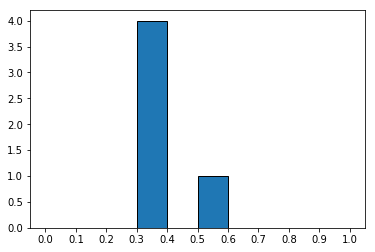

In [59]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [64]:
def intercluster_dist():
    indices = range(num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(dv_matrix[[x[1] for x in cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(dv_matrix[[x[1] for x in cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [65]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 1.1789743
